In [1]:
import os
import numpy as np
import igraph
from py2cytoscape import util
from cyjupyter import Cytoscape
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 

In [2]:
rdBase.rdkitVersion

'2018.03.4'

In [8]:
filedir = os.path.join(RDConfig.RDDocsDir,'Book/data/cdk2.sdf')
mols = [mol for mol in Chem.SDMolSupplier(filedir) if mol != None]
for mol in mols:
    AllChem.Compute2DCoords(mol)
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]
smiles_list = [Chem.MolToSmiles(mol) for mol in mols]

In [9]:
g = igraph.Graph()
for smiles in smiles_list:
    g.add_vertex(name=smiles)
for i in range(len(mols)):
    for j in range(i):
        tc = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        if tc >= 0.5:
            g.add_edge(smiles_list[i], smiles_list[j])

In [10]:
graph_data = util.from_igraph(g)

In [11]:
Cytoscape(data=graph_data)

Cytoscape(data={'elements': {'nodes': [{'data': {'id': '0', 'name': 'CC(C)C(=O)COc1nc(N)nc2[nH]cnc12'}}, {'dat…

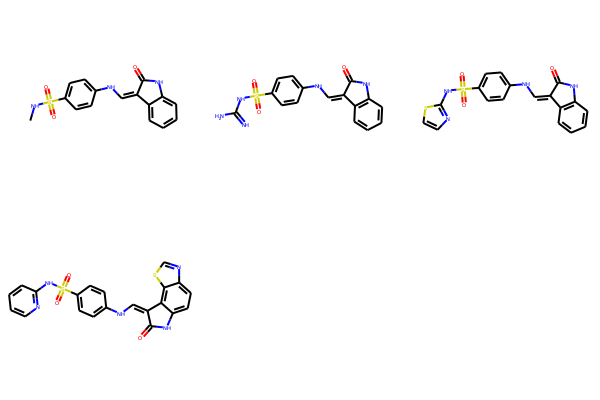

In [12]:
Draw.MolsToGridImage([mols[25],mols[26],mols[38],mols[46]])

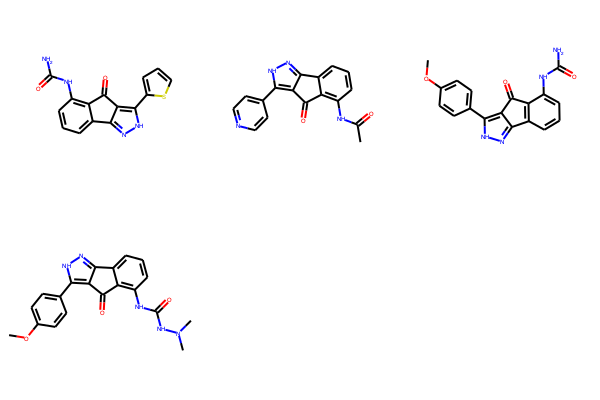

In [13]:
Draw.MolsToGridImage([mols[15], mols[18], mols[19],mols[20]])